<a href="https://colab.research.google.com/github/ConstDahoud/perceptron/blob/main/02_classification_with_multilayer_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification with Multilayer perceptron


## Setup

In [ ]:
import sys
assert sys.version_info >= (3, 6)

import numpy as np
import matplotlib.pyplot as plt

## Make a Dataset

In [ ]:
input_coordinates = np.array([(x/10, y/10) for x in range(50) for y in range(30)])
input_coordinates.shape    # (n_smaples, n_input_neurons)

(1500, 2)

## Define weights and bias

In [ ]:
W1 = np.array([[1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1],
               [1, -1, -1, 1, -1, 1, -1, 1, -1, 1, 1]]
              , float)
b1 = np.array([[-2, 3, 0.5, 0.5, -1.75, 2.25, -3.25, 3.75, 6.25, -5.75, -4.75]]
              , float)

W2 = np.array([[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1],
               [0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0],
               [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1]]
              , float).transpose()
b2 = np.array([[-3, -3, -3, -3]], float)

W3 = np.array([[1, 1, 1, 1]], float).transpose()
b3 = np.array([[3]], float)

## Define activation function

In [ ]:
def activation(matrix):
    return ((1 * (matrix >= 0)) + (-1 * (matrix < 0)))

## Forward pass

In [ ]:
layer1 = activation(input_coordinates.dot(W1) + b1)    # ((1500, 2) @ (2, 11)) + (1500, 11) = (1500, 11)
layer2 = activation(layer1.dot(W2) + b2)    # ((1500, 11) @ (11, 4)) + (1500, 4) = (1500, 4)
outputs = activation(layer2.dot(W3) + b3)    # ((1500, 4) @ (4, 1)) + (1500, 1) = (1500, 1)
outputs.shape

(1500, 1)

## Plot the outputs

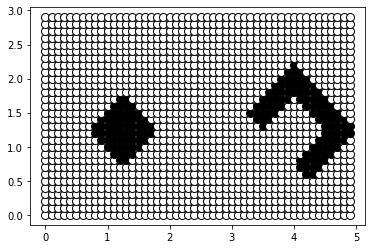

In [ ]:
for index, result in enumerate(outputs.flat):
    x, y = input_coordinates[index]
    if result == 1:
        plt.plot(x, y, 'o', mec='k', mfc='k', ms=8)
    else:
        plt.plot(x, y, 'o', mec='k', mfc='w', ms= 8)